✅ Transformation pipeline created successfully!
✅ Dataset loaded successfully with 8 images.
Classes found: ['class_0_non_agri', 'class_1_agri']
✅ Class-to-Index mapping: {'class_0_non_agri': 0, 'class_1_agri': 1}
Batch image tensor shape: torch.Size([8, 3, 64, 64])
Batch labels shape: torch.Size([8])
✅ One batch loaded successfully.


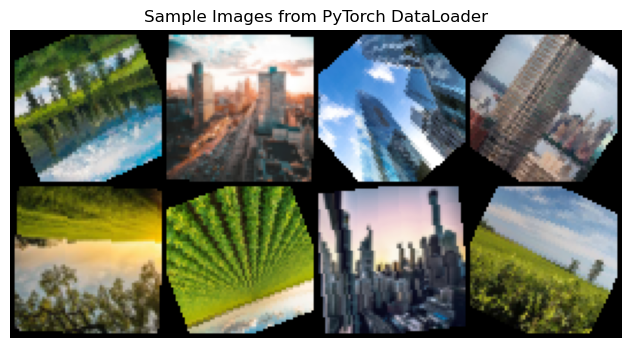

In [1]:
# =============================================
# QUESTION 3 — DATA LOADING AND AUGMENTATION USING PYTORCH
# =============================================

import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

# ------------------------------------------------------------
# TASK 1: Define transformation pipeline
# ------------------------------------------------------------
custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),          # resize images
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(45),
    transforms.ToTensor()                 # convert to tensor (C,H,W)
])

print("✅ Transformation pipeline created successfully!")

# ------------------------------------------------------------
# TASK 2: Load dataset using ImageFolder
# ------------------------------------------------------------
dataset_path = '../images_dataSAT'   # use './images_dataSAT' if notebook is in root
imagefolder_dataset = datasets.ImageFolder(
    root=dataset_path,
    transform=custom_transform
)

print(f"✅ Dataset loaded successfully with {len(imagefolder_dataset)} images.")
print("Classes found:", imagefolder_dataset.classes)

# ------------------------------------------------------------
# TASK 3: Print class names and indices
# ------------------------------------------------------------
print("✅ Class-to-Index mapping:", imagefolder_dataset.class_to_idx)

# ------------------------------------------------------------
# TASK 4: Retrieve and display image shapes from a batch
# ------------------------------------------------------------
imagefolder_loader = DataLoader(imagefolder_dataset, batch_size=8, shuffle=True)
images, labels = next(iter(imagefolder_loader))

print("Batch image tensor shape:", images.shape)   # (B, C, H, W)
print("Batch labels shape:", labels.shape)
print("✅ One batch loaded successfully.")

# ------------------------------------------------------------
# TASK 5: Display images in the custom loader batch
# ------------------------------------------------------------
# Convert from (C,H,W) to (H,W,C) for matplotlib
grid_img = torchvision.utils.make_grid(images, nrow=4)
plt.figure(figsize=(8, 4))
plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off')
plt.title("Sample Images from PyTorch DataLoader")
plt.show()
